In [1]:
from dis import dis
from tkinter.tix import AUTO
from requests import head
import torch
import config
import os
from glob import glob
from shutil import copyfile
import pandas as pd
import re
import numpy as np
from math import sqrt
import math
import tensorflow as tf
from keras import regularizers
from tensorflow.keras import Model, Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from re import X
import numpy as np
import torch
import pandas as pd
from torch.nn.utils.rnn import pack_padded_sequence
from torch.utils.data import DataLoader
from CustomDataset import CustomRawDataset
from model_dispatcher import dispatch_model
# from model_dispatcher_cnn import dispatch_model
import config
from torch import nn
import os
from glob import glob
from torch.optim import Adam, SGD
from torch.optim.lr_scheduler import ReduceLROnPlateau
from datetime import date, timedelta, datetime
import time
import random
from torch.utils.tensorboard import SummaryWriter
from CustomDataset import custom_collate_fn
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation,TimeDistributed
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\acer\AppData\Local\Temp\ipykernel_19056\4271784750.py:2: DeprecationWarning: The Tix Tk extension is unmaintained, and the tkinter.tix wrapper module is deprecated in favor of tkinter.ttk
  from tkinter.tix import AUTO


In [29]:
raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed", "*", "*.csv"))
# print(raw_angle_files_1)
all_filenames = [i for i in raw_angle_files_1]
df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
data=df
data.to_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged.csv",index=False)
#df=pd.read_csv(r"D:\Research_Project\My_project_22\FEATURES_EXTRACTED\DISTANCES\both_hand_frontup_left_leg_frontup\aatish_both_hand_frontup_left_leg_frontup_trial1_interpolated.csv")
   
# data=df
# print(data.shape)
# target=data['54']
# data=data.drop(['54'],axis=1)
# # data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)

In [2]:
data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\merged.csv")
data.head()
target=data['166']
data=data.drop(['166'],axis=1)
# data.head()
# print(data.shape)
# AutoEncoder(data)
# data['12']=target
# print(data.shape)
print(data.shape)
print(target.shape)

(12260, 166)
(12260,)


<AxesSubplot:>

<Figure size 3000x2500 with 0 Axes>

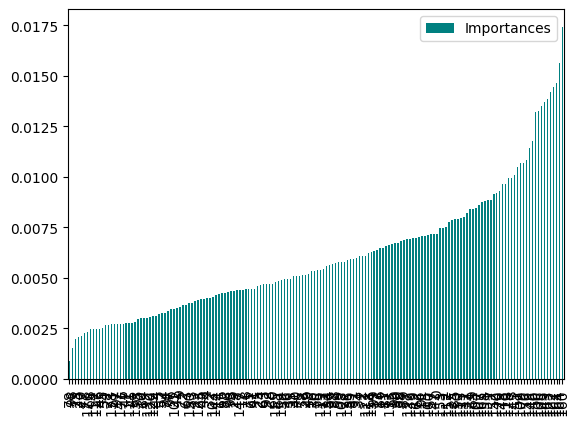

In [3]:
from sklearn.ensemble import RandomForestClassifier
# create the random forest with your hyperparameters.
model = RandomForestClassifier(n_estimators=342)

# fit the model to start training.

model.fit(data, target)

# get the importance of the resulting features.
importances = model.feature_importances_

# create a data frame for visualization.

final_df = pd.DataFrame({"Features": pd.DataFrame(data).columns, "Importances":importances})
final_df.set_index("Importances")

# sort in ascending order to better visualization.
final_df =final_df.sort_values('Importances')
plt.figure(figsize=(30,25))

# plot the feature inportances in bars.
final_df.plot.bar(color = 'teal')

    Features  Importances
78        78     0.000890
98        98     0.001525
73        73     0.001952
23        23     0.002081
20        20     0.002119
..       ...          ...
122      122     0.014203
102      102     0.014437
161      161     0.014637
164      164     0.015641
160      160     0.017437

[166 rows x 2 columns]


<BarContainer object of 166 artists>

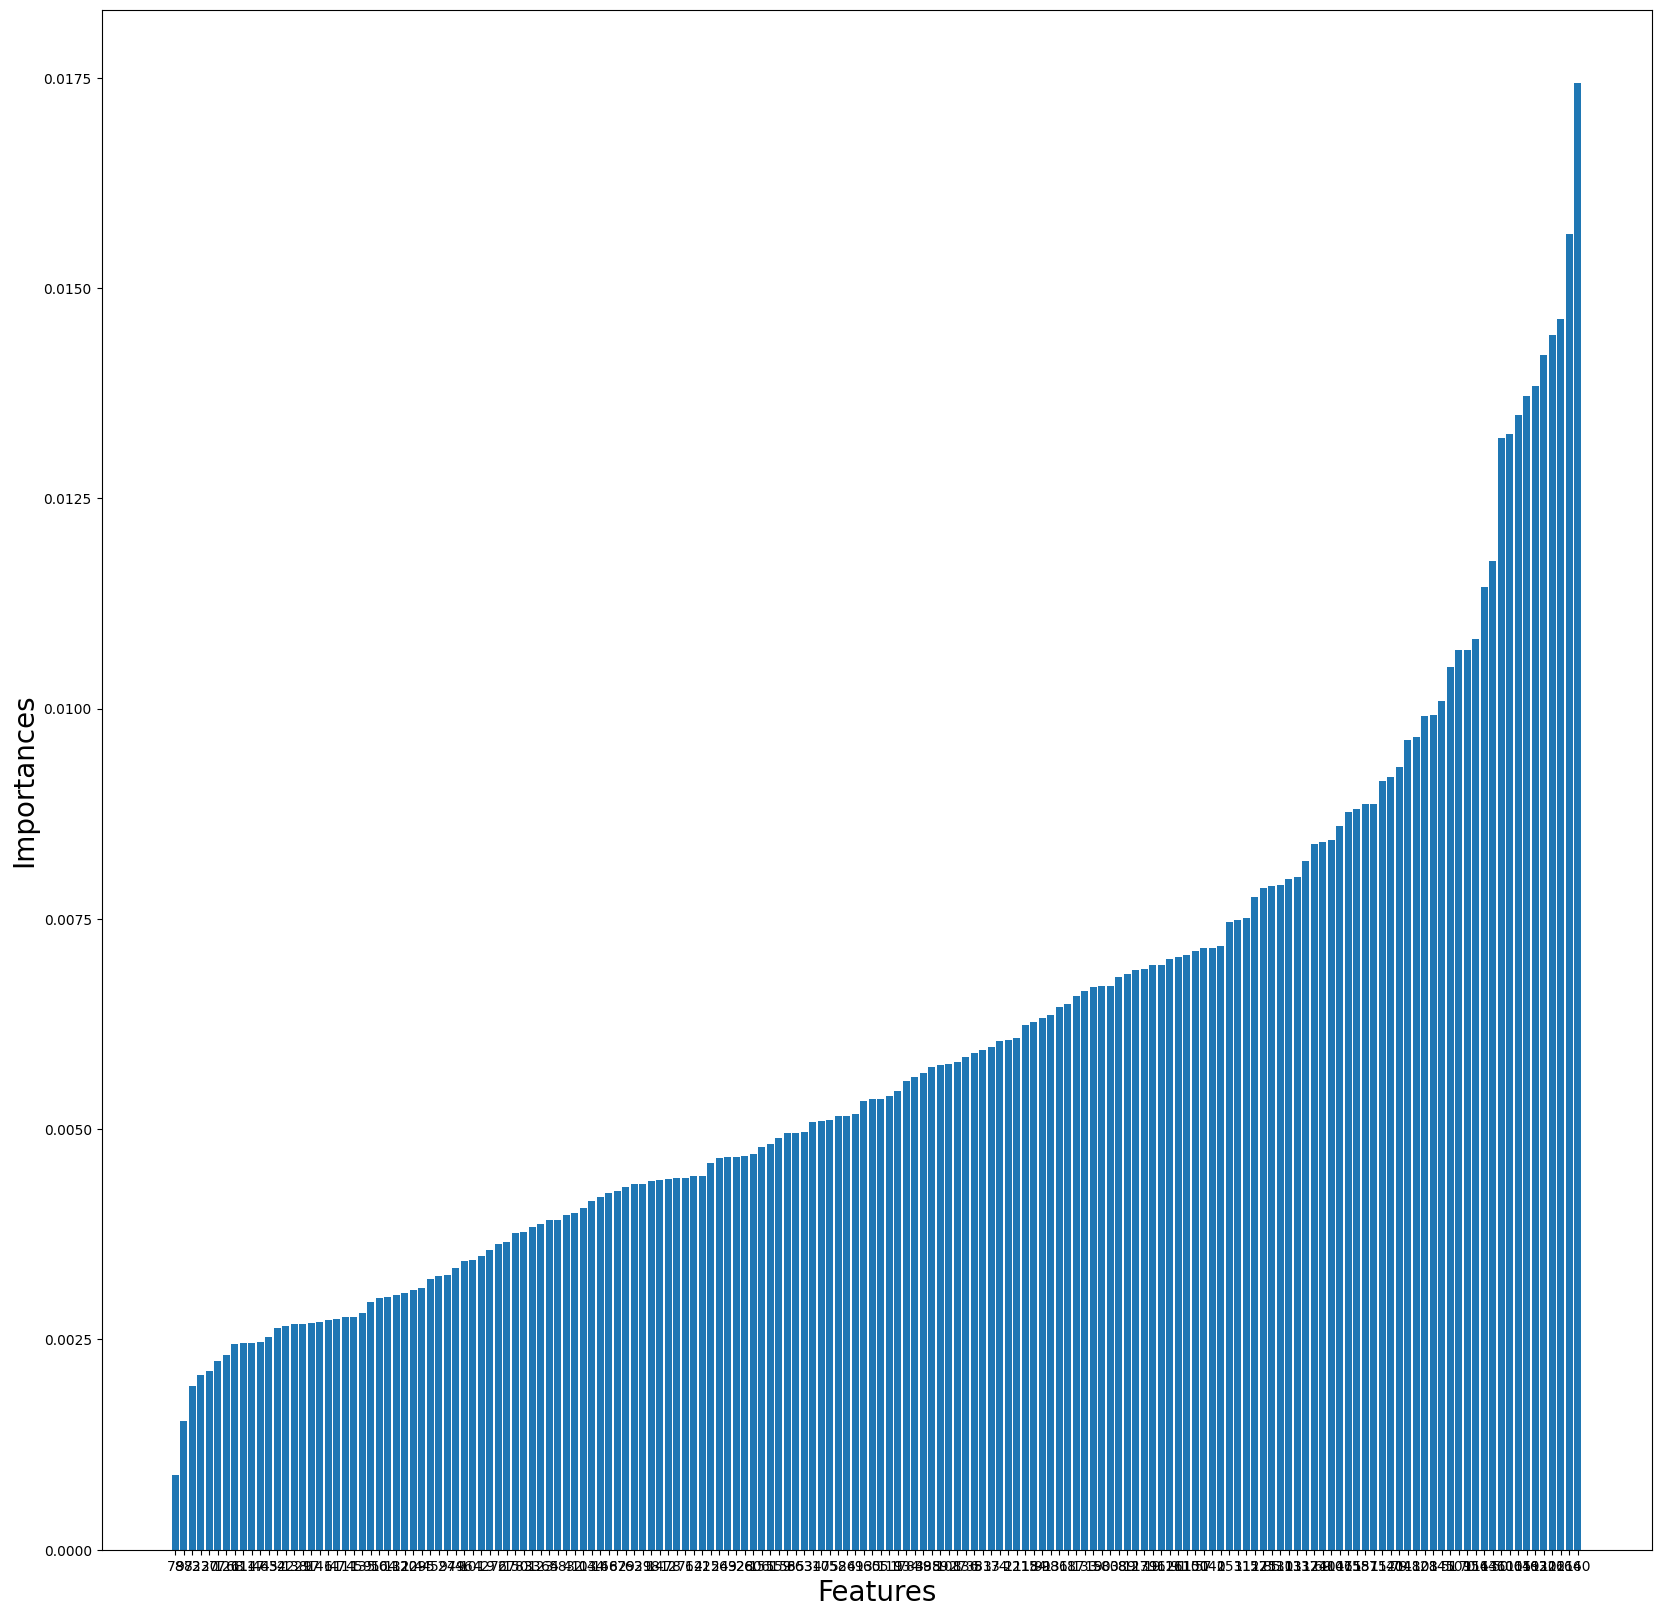

In [4]:
print(final_df)
plt.figure(figsize=(20,20))
plt.xlabel('Features',size=20)
plt.ylabel('Importances',size=20)
plt.bar(final_df['Features'],final_df['Importances'],label="Importance")


In [5]:
# for i in range(len(final_df)-26,len(final_df)):
#     print(final_df[i].importances)
# print(len(final_df))

x=list(final_df['Features'])
sorted_id=[]
for i in range(-27,-1):
    x[i]=str(x[i])
    sorted_id.append(x[i])
data=data[sorted_id] 
data.head()


,158,151,7,152,140,79,148,110,128,3,...,146,50,106,105,149,163,122,102,161,164
0,1.246003,2.261033,0.253687,1.650141,0.540860,0.409982,2.216000,0.446287,0.483507,0.257537,...,0.446047,0.414414,2.316167,0.375580,0.346157,0.113375,0.397397,0.373833,-0.027582,0.031990
1,1.296214,2.268333,0.252057,1.632925,0.542580,0.404327,2.224300,0.449207,0.482320,0.260437,...,0.449470,0.436329,2.317200,0.379317,0.350710,0.088090,0.401893,0.378393,-0.009114,0.029938
2,1.306293,2.270667,0.251537,1.627664,0.544257,0.405290,2.227500,0.451327,0.482950,0.261410,...,0.450647,0.442395,2.317700,0.380610,0.352113,0.079567,0.403303,0.379813,-0.002401,0.029953
3,1.302433,2.270800,0.251446,1.626473,0.545180,0.407274,2.228000,0.452303,0.483680,0.261484,...,0.450833,0.441379,2.317867,0.380717,0.352107,0.078291,0.403313,0.379817,-0.001148,0.030147
4,1.296863,2.270833,0.251438,1.624955,0.544767,0.408114,2.228167,0.451847,0.483077,0.261522,...,0.451043,0.441859,2.317967,0.380730,0.352097,0.077394,0.403287,0.379800,-0.000888,0.030157


In [6]:
len1=data.shape[1]
l1=list(range(0,len1))
l2=[]
for i in l1:
    i=str(i)
    l2.append(i)
l1=l2
    
data.columns=l1
data.head()
data['26']=target
data.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.246003,2.261033,0.253687,1.650141,0.540860,0.409982,2.216000,0.446287,0.483507,0.257537,...,0.414414,2.316167,0.375580,0.346157,0.113375,0.397397,0.373833,-0.027582,0.031990,0
1,1.296214,2.268333,0.252057,1.632925,0.542580,0.404327,2.224300,0.449207,0.482320,0.260437,...,0.436329,2.317200,0.379317,0.350710,0.088090,0.401893,0.378393,-0.009114,0.029938,0
2,1.306293,2.270667,0.251537,1.627664,0.544257,0.405290,2.227500,0.451327,0.482950,0.261410,...,0.442395,2.317700,0.380610,0.352113,0.079567,0.403303,0.379813,-0.002401,0.029953,0
3,1.302433,2.270800,0.251446,1.626473,0.545180,0.407274,2.228000,0.452303,0.483680,0.261484,...,0.441379,2.317867,0.380717,0.352107,0.078291,0.403313,0.379817,-0.001148,0.030147,0
4,1.296863,2.270833,0.251438,1.624955,0.544767,0.408114,2.228167,0.451847,0.483077,0.261522,...,0.441859,2.317967,0.380730,0.352097,0.077394,0.403287,0.379800,-0.000888,0.030157,0


In [7]:
len1=data.shape[1]
l1=list(range(0,len1))
l2=[]
for i in l1:
    i=str(i)
    l2.append(i)
l1=l2
    
data.columns=l1
data.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.246003,2.261033,0.253687,1.650141,0.540860,0.409982,2.216000,0.446287,0.483507,0.257537,...,0.414414,2.316167,0.375580,0.346157,0.113375,0.397397,0.373833,-0.027582,0.031990,0
1,1.296214,2.268333,0.252057,1.632925,0.542580,0.404327,2.224300,0.449207,0.482320,0.260437,...,0.436329,2.317200,0.379317,0.350710,0.088090,0.401893,0.378393,-0.009114,0.029938,0
2,1.306293,2.270667,0.251537,1.627664,0.544257,0.405290,2.227500,0.451327,0.482950,0.261410,...,0.442395,2.317700,0.380610,0.352113,0.079567,0.403303,0.379813,-0.002401,0.029953,0
3,1.302433,2.270800,0.251446,1.626473,0.545180,0.407274,2.228000,0.452303,0.483680,0.261484,...,0.441379,2.317867,0.380717,0.352107,0.078291,0.403313,0.379817,-0.001148,0.030147,0
4,1.296863,2.270833,0.251438,1.624955,0.544767,0.408114,2.228167,0.451847,0.483077,0.261522,...,0.441859,2.317967,0.380730,0.352097,0.077394,0.403287,0.379800,-0.000888,0.030157,0


In [8]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :26], sequences[end_ix-1, 26:]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [9]:
# raw_angle_files_1 = glob(os.path.join("D:\Research_Project\My_project_22\input\preprocessed_modified", "*", "*.csv"))
# # print(raw_angle_files_1)
# all_filenames = [i for i in raw_angle_files_1]
# df = pd.concat(map(pd.read_csv, all_filenames),ignore_index=True)
# data=pd.read_csv(r"D:\Research_Project\My_project_22\input\final_preprocessed_merged\tree_classifier_extracted.csv")
# print(df.shape)
# df = df.sample(frac = 1)
# # df.iloc[1:10,:]
data=pd.get_dummies(data,columns=['26'])
data=data.to_numpy()
x,y=split_sequences(data,6)
# x=x[None:]
# print(x.shape)
# print(y.shape)
# data=data.to_numpy()
print(data.shape)

# y=data.iloc[:,26:]
# x=data.iloc[:,:26]
# # x=data[-1:26]
# print(x.shape)
# print(y.shape)
# x=x.to_numpy()
# y=y.to_numpy()
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(type(y_train))



model = Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(6,26)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(Dense(100, activation='relu'))
model.add(layers.BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.summary()


# model.summary()
# # log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# # tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
print(y_train)
print(y_train.shape)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# # print(x.shape)
history = model.fit(x_train, y_train,batch_size=config.BATCH_SIZE,epochs=100,validation_data=(x_test,y_test),verbose=1)
results = model.evaluate(x_test, y_test)
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_test=np.argmax(y_test,axis=1)
# print(y_pred)
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

(12260, 36)
(9804, 6, 26)
(9804, 10)
<class 'numpy.ndarray'>
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             5056      
                                                                 
 conv1d_1 (Conv1D)           (None, 2, 64)             12352     
                                                                 
 dropout (Dropout)           (None, 2, 64)             0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 100)               6500  

In [10]:
cf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion matrix\n',cf_matrix)
print(classification_report(y_test,y_pred))

Confusion matrix
 [[255   0   1   0   1   4   2   0   0   0]
 [  8 233   0   1   0   1   7   0   5   0]
 [  4   8 233   0   0   0   6  17  10   0]
 [  4   8  42 170   0   4   0   2   0   0]
 [  0   0   1   0 226   8  11   7   3   0]
 [  1   0   0   0   9 152  19   8   1   0]
 [  1   0   1   0   6   0 284  20   1   0]
 [  0   0   0   1  13   7   9 182   4   0]
 [  1   1  20   0  16   0   9   9 198   0]
 [  8   0   4   0  14   6   1  17   6 140]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       263
           1       0.93      0.91      0.92       255
           2       0.77      0.84      0.80       278
           3       0.99      0.74      0.85       230
           4       0.79      0.88      0.84       256
           5       0.84      0.80      0.82       190
           6       0.82      0.91      0.86       313
           7       0.69      0.84      0.76       216
           8       0.87      0.78      0.82       254
          

In [11]:

print('specificity:')
tot=0
for i in range (10):
    sum=0
    for j in range(10):
        sum=sum+cf_matrix[i,j]
    spec=cf_matrix[i,i]/sum
    tot+=spec
    print(i," ",spec)
print('specificity avg\n',tot/10)

specificity:
0   0.9695817490494296
1   0.9137254901960784
2   0.8381294964028777
3   0.7391304347826086
4   0.8828125
5   0.8
6   0.9073482428115016
7   0.8425925925925926
8   0.7795275590551181
9   0.7142857142857143
specificity avg
 0.838713377917592


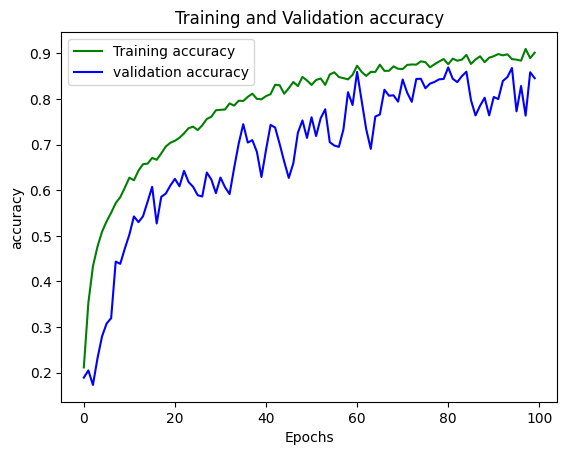

In [12]:
acc_train = history.history["accuracy"]
acc_val = history.history["val_accuracy"]
epochs = range(1,99)
plt.plot(acc_train, 'g', label='Training accuracy')
plt.plot(acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

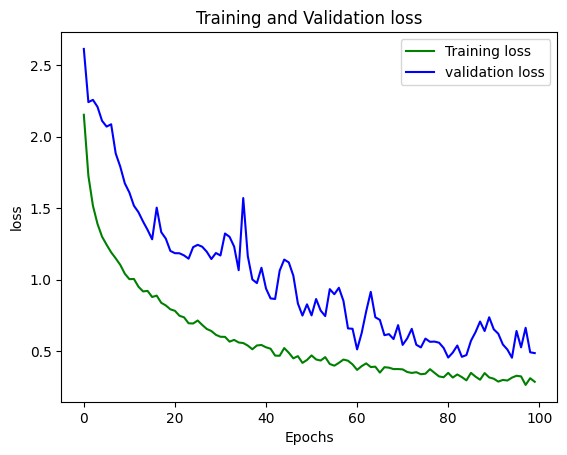

In [13]:
loss_train = history.history["loss"]
loss_val = history.history["val_loss"]
epochs = range(1,99)
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()